Import Library

In [37]:
import os
import cv2
import numpy as np
import pandas as pd
from tabulate import tabulate

Directory

In [38]:
image_directory_training="../../Code/Dataset/preprocessed_roi_augmentation/2_label/DataSet_Training"
image_directory_testing="../../Code/Dataset/preprocessed_roi_augmentation/2_label/DataSet_Testing"

Ekstraksi Fitur RGB

In [39]:
def ef_rgb_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]
      
      # NYALAKAN SALAH SATU AJA BEB YG DIBAWAH
      # KLO MAU RED NYALAIN YG RED AJA YG LAIN DIMATIKAN
      
      # menambahkan nilai R ke dalam list
      features_training.append([np.mean(red), a])
      
      # menambahkan nilai R ke dalam list
      # features_training.append([np.mean(green), a])
      
      # menambahkan nilai R ke dalam list
      # features_training.append([np.mean(blue), a])

  return features_training


def ef_rgb_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]

      # NYALAKAN SALAH SATU AJA BEB YG DIBAWAH
      # KLO MAU RED NYALAIN YG RED AJA YG LAIN DIMATIKAN

      # menambahkan nilai R ke dalam list
      features_testing.append([np.mean(red), a])

      # menambahkan nilai R ke dalam list
      # features_testing.append([np.mean(green), a])

      # menambahkan nilai R ke dalam list
      # features_testing.append([np.mean(blue), a])

  return features_testing


Inisialisasi Data Training

In [40]:
train_data = ef_rgb_training(image_directory_training)

# header tabel
header = ["Nilai Ekstraksi", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-------------------+---------+
|   Nilai Ekstraksi |   Label |
+===================+=========+
|          127.425  |       1 |
+-------------------+---------+
|          152.505  |       1 |
+-------------------+---------+
|          122.684  |       1 |
+-------------------+---------+
|          122.686  |       1 |
+-------------------+---------+
|          128.437  |       1 |
+-------------------+---------+
|          143.118  |       1 |
+-------------------+---------+
|          128.424  |       1 |
+-------------------+---------+
|          121.547  |       1 |
+-------------------+---------+
|          120.597  |       1 |
+-------------------+---------+
|          125.219  |       1 |
+-------------------+---------+
|          125.233  |       1 |
+-------------------+---------+
|          125.229  |       1 |
+-------------------+---------+
|          152.505  |       1 |
+-------------------+---------+
|          125.231  |       1 |
+-------------------+---------+
|       

Inisialisasi Data Testing

In [41]:
test_data = ef_rgb_testing(image_directory_testing)

# header tabel
header = ["Nilai Ekstraksi", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-------------------+---------+
|   Nilai Ekstraksi |   Label |
+===================+=========+
|           146.418 |       1 |
+-------------------+---------+
|           126.373 |       1 |
+-------------------+---------+
|           126.372 |       1 |
+-------------------+---------+
|           155.763 |       1 |
+-------------------+---------+
|           126.372 |       1 |
+-------------------+---------+
|           126.372 |       1 |
+-------------------+---------+
|           115.806 |       1 |
+-------------------+---------+
|           132.109 |       1 |
+-------------------+---------+
|           115.794 |       1 |
+-------------------+---------+
|           138.147 |       1 |
+-------------------+---------+
|           130.109 |       1 |
+-------------------+---------+
|           111.841 |       1 |
+-------------------+---------+
|           130.108 |       1 |
+-------------------+---------+
|           130.109 |       1 |
+-------------------+---------+
|       

Klasifikasi Model KNN

In [42]:
# Pisahkan nilai ekstraksi (X_train) dan label (y_train) untuk data training
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data]

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat Model KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# Pisahkan nilai ekstraksi (X_test) dan label (y_true) untuk data testing
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [45]:
# prediksi data testing menggunakan model yang sudah di latih
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [46]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel rgb
header = ["Nilai Ekstraksi","True Label", "Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))

+-------------------+--------------+-----------------+
|   Nilai Ekstraksi |   True Label |   Predict Label |
+===================+==============+=================+
|           146.418 |            1 |               1 |
+-------------------+--------------+-----------------+
|           126.373 |            1 |               1 |
+-------------------+--------------+-----------------+
|           126.372 |            1 |               1 |
+-------------------+--------------+-----------------+
|           155.763 |            1 |               2 |
+-------------------+--------------+-----------------+
|           126.372 |            1 |               1 |
+-------------------+--------------+-----------------+
|           126.372 |            1 |               1 |
+-------------------+--------------+-----------------+
|           115.806 |            1 |               1 |
+-------------------+--------------+-----------------+
|           132.109 |            1 |               2 |
+---------

Evaluasi Model

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.44      0.51        32
           2       0.56      0.72      0.63        32

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.57        64
weighted avg       0.58      0.58      0.57        64



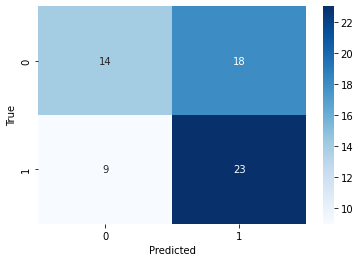

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()